In [15]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud

In [16]:
# Load data
df = pd.read_csv('../data/skytrax_reviews.csv', sep=';', index_col=0)

In [17]:
# Binarize
df['binary_label'] = df['Sentiment'].map({'positive': 1, 'negative':0})

# Reformat
Y = df['binary_label'].to_numpy()


In [18]:
# Split data
df_train, df_test, Ytrain, Ytest = train_test_split(df['review_text'].values.astype('U'), Y, test_size=0.33)

In [19]:
# Feature Engineering
featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [20]:
model = RandomForestClassifier()
model.fit(Xtrain, Ytrain)
print("Train Accuracy:", model.score(Xtrain, Ytrain))
print("Test Accuracy:", model.score(Xtest, Ytest))

Train Accuracy: 1.0
Test Accuracy: 0.9065454545454545


In [21]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("Train F1:", f1_score(Ytrain, Ptrain))
print("Test F1:", f1_score(Ytest, Ptest))

Train F1: 1.0
Test F1: 0.9069627126825148


In [22]:
# AUC
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC", roc_auc_score(Ytrain, Prob_train))
print("test AUC", roc_auc_score(Ytest, Prob_test))

train AUC 1.0
test AUC 0.9690386226435017


In [23]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[16761,     0],
       [    0, 16739]], dtype=int64)

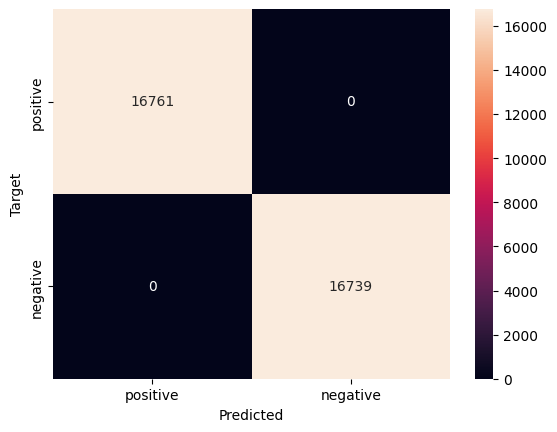

In [24]:
# Plotting the confusion matrix
def plot_cm(cm):
  classes = ['positive', 'negative']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)